In [67]:
# Linear Regression Example: Predicting House Prices 🏠

# Importing necessary libraries
# -----------------------------------------------
# numpy: For numerical operations and creating arrays
# pandas: Not used here directly, but useful for data tables (included just in case)
# matplotlib.pyplot: For plotting data and charts
# sklearn.model_selection.train_test_split: For splitting our data into training and test sets
# sklearn.metrics: For evaluating the model's performance
# linear_regression: Our custom module containing the LinearRegressionModel class

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from linear_regression import LinearRegressionModel 

In [68]:
# ---------------------------------------------------------
# Step 1: Generate fake (synthetic) housing data
# ---------------------------------------------------------

# ❓ Why: We're not using a real dataset.
# Instead, we'll create our own data that simulates real-world housing info.

# Set a seed for NumPy's random number generator.
# ❓ Why: This makes our results repeatable every time we run the script.
np.random.seed(42)

# We'll generate 100 "fake" houses
n_samples = 100

# -------------------
# Create feature 1: Square footage
# -------------------
# np.random.randint(start, stop, size=(n_samples, 1)) creates random integers.
# We're simulating square footage between 500 and 3500.
# The shape (100, 1) means we want a 2D array with 100 rows and 1 column.
square_feet = np.random.randint(500, 3500, size=(n_samples, 1))

# -------------------
# Create feature 2: Number of bedrooms
# -------------------
# Each house has between 1 and 5 bedrooms.
bedrooms = np.random.randint(1, 6, size=(n_samples, 1))

# -------------------
# Create feature 3: Number of bathrooms
# -------------------
# Each house has between 1 and 4 bathrooms.
bathrooms = np.random.randint(1, 5, size=(n_samples, 1))

# -------------------
# Create feature 4: Age of the house (in years)
# -------------------
# We're simulating house age from 0 to 50 years old.
age = np.random.randint(0, 51, size=(n_samples, 1))

# -------------------
# Combine all features into one matrix (X)
# -------------------
# ❓ Why: Most ML models expect all input features in one 2D array.
# np.hstack combines arrays horizontally (i.e., columns side by side).
# So shape becomes (100, 4): 100 houses, 4 features.
X = np.hstack([square_feet, bedrooms, bathrooms, age])

# -------------------
# Create the target variable: price
# -------------------
# ❓ Why: This is what we want the model to learn to predict.

# Let’s define the "true" relationship between the features and price using made-up weights:
#   - $150 per square foot
#   - $10,000 per bedroom
#   - $7,000 per bathroom
#   - -$500 per year of age (older houses are cheaper)
true_weights = np.array([150, 10000, 7000, -500]).reshape(-1, 1)
# np.array(...).reshape(-1, 1): Creates a 2D column vector of weights (shape: 4x1)

# Now compute the price using matrix multiplication:
# X.dot(true_weights) → (100, 4) ⋅ (4, 1) = (100, 1)
# ❓ This gives us a predicted price for each house (before adding noise).
price = X.dot(true_weights)

# Add some random noise to simulate real-world unpredictability.
# np.random.normal(mean, std_dev, shape)
# Adds random values centered at 0 with std dev = 10,000.
noise = np.random.normal(0, 10000, size=price.shape)

# Final price = base price + noise
y = price + noise  # y is the output we want to predict

In [69]:
# ---------------------------------------------------------
# Step 2: Split data into training and test sets
# ---------------------------------------------------------

# ❓ Why: We train on one set of data and test on another to see how well the model generalizes.
# train_test_split splits X and y into training and test subsets.
# test_size=0.2 → 20% goes to testing, 80% to training.
# random_state ensures we get the same split every time.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [70]:
# ---------------------------------------------------------
# Step 3: Train the Linear Regression model
# ---------------------------------------------------------

# Create an instance of our custom LinearRegressionModel class
model = LinearRegressionModel()

# Train the model using training data
# This fits the internal model to learn the relationship between X_train and y_train
model.train(X_train, y_train)

In [71]:
# ---------------------------------------------------------
# Step 4: Make predictions using test data
# ---------------------------------------------------------

# Use the trained model to predict prices on the test set
# model.predict(X) returns predicted y values
y_pred = model.predict(X_test)

In [72]:
# ---------------------------------------------------------
# Step 5: Evaluate model performance
# ---------------------------------------------------------

# mean_squared_error compares actual vs predicted values
# ❓ Measures the average squared difference (smaller = better)
mse = mean_squared_error(y_test, y_pred)

# r2_score tells how well the model fits the data
# 1.0 = perfect fit, 0 = no better than guessing the average
r2 = r2_score(y_test, y_pred)

# Get the coefficients and intercept from the model
coef, intercept = model.coefficients()

# coef may be a 2D array, so we flatten it to 1D to make it easier to read
coef = coef.flatten()

# Print out each feature's contribution to the price
print("📈 Coefficients (how much each feature affects price): \ntrue_weights = np.array([150, 10000, 7000, -500]).reshape(-1, 1)")
print(f"  - Square Footage: ${coef[0]} per sq ft")
print(f"  - Bedrooms:       ${coef[1]} per bedroom")
print(f"  - Bathrooms:      ${coef[2]} per bathroom")
print(f"  - Age:            ${coef[3]} per year (usually negative)")

# Print the model’s intercept (base price when all features are 0)
print(f"📊 Base price (intercept): ${intercept}")
print(f"🧮 Mean Squared Error: {mse}")
print(f"✅ R² Score: {r2}")


📈 Coefficients (how much each feature affects price): 
true_weights = np.array([150, 10000, 7000, -500]).reshape(-1, 1)
  - Square Footage: $148.09102129493186 per sq ft
  - Bedrooms:       $10141.926622860514 per bedroom
  - Bathrooms:      $8250.001402935097 per bathroom
  - Age:            $-555.5888979651795 per year (usually negative)
📊 Base price (intercept): $[2296.96996632]
🧮 Mean Squared Error: 122089274.5697542
✅ R² Score: 0.9919150027299997


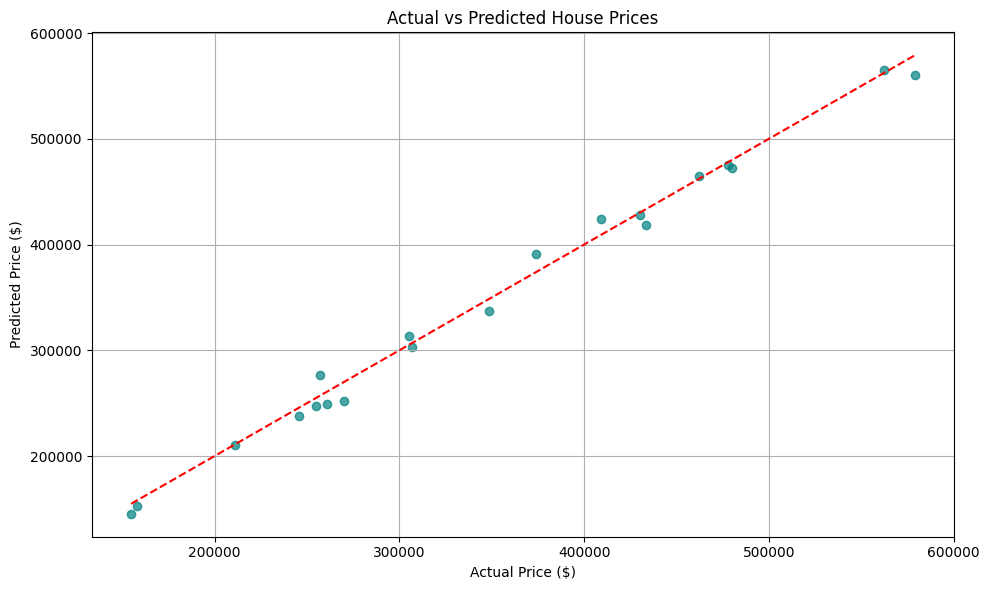

In [73]:
# ---------------------------------------------------------
# Step 6: Visualize Actual vs Predicted Prices
# ---------------------------------------------------------

# ❓ Why: A scatter plot shows how well predictions match the real prices.

# Create a blank figure
plt.figure(figsize=(10, 6))

# Plot test data: actual vs predicted
# x-axis: actual prices, y-axis: predicted prices
# If perfect, all points would lie on the red dashed line
plt.scatter(y_test, y_pred, color="teal", alpha=0.7)

# Add a diagonal line (perfect prediction line)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--")

# Add title and axis labels
plt.title("Actual vs Predicted House Prices")
plt.xlabel("Actual Price ($)")
plt.ylabel("Predicted Price ($)")

# Add grid for readability
plt.grid(True)

# Layout adjustment to avoid clipping
plt.tight_layout()

# Display the plot
plt.show()